<H4> Importing required libraries

In [79]:
# Data manipulation
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# Importing the dataset 
df = pd.read_csv('ad_campaign_performance.csv')

<H4> Data Audit

In [83]:
# First five rows of dataset
df.head()

,Campaign_ID,Budget,Duration,Platform,Content_Type,Target_Age,Target_Gender,Region,Clicks,Conversions,CTR,CPC,Conversion_Rate,Success
0,CAMP-XAJI0Y,15895,39,Instagram,Video,35-44,Female,US,48297,2116,303.850267,0.329109,4.381225,1
1,CAMP-6DPBHS,960,8,LinkedIn,Video,45-54,Female,UK,15097,2340,1572.604167,0.063589,15.499768,1
2,CAMP-AHXTHV,38258,54,YouTube,Image,35-44,All,US,8134,2740,21.260913,4.703467,33.685763,1
3,CAMP-3A3ZMF,44832,28,Facebook,Text,25-34,Female,US,21801,4277,48.628212,2.056419,19.618366,1
4,CAMP-8MDD4V,11384,36,Google,Story,18-24,All,UK,16503,1488,144.966620,0.689814,9.016542,1


In [85]:
# Last 5 rows
df.tail()

,Campaign_ID,Budget,Duration,Platform,Content_Type,Target_Age,Target_Gender,Region,Clicks,Conversions,CTR,CPC,Conversion_Rate,Success
995,CAMP-4RX6PR,15828,13,YouTube,Carousel,18-24,All,US,20836,3524,131.640131,0.759647,16.913035,1
996,CAMP-YIEJ9C,23375,60,Instagram,Story,55+,Male,India,44615,1764,190.866310,0.523927,3.953827,1
997,CAMP-0UU5WR,6838,25,YouTube,Story,35-44,Female,UK,20233,3292,295.890611,0.337963,16.270449,1
998,CAMP-YESU4F,16013,28,Google,Image,55+,All,India,49820,2489,311.122213,0.321417,4.995986,1
999,CAMP-CL5EFJ,35340,36,YouTube,Story,18-24,Female,UK,1182,2701,3.344652,29.898477,228.510998,0


In [87]:
# shape of dataset
df.shape

(1000, 14)

In [89]:
# columns present in dataset 
df.columns

Index(['Campaign_ID', 'Budget', 'Duration', 'Platform', 'Content_Type',
       'Target_Age', 'Target_Gender', 'Region', 'Clicks', 'Conversions', 'CTR',
       'CPC', 'Conversion_Rate', 'Success'],
      dtype='object')

In [91]:
# concise summary of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_ID      1000 non-null   object 
 1   Budget           1000 non-null   int64  
 2   Duration         1000 non-null   int64  
 3   Platform         1000 non-null   object 
 4   Content_Type     1000 non-null   object 
 5   Target_Age       1000 non-null   object 
 6   Target_Gender    1000 non-null   object 
 7   Region           1000 non-null   object 
 8   Clicks           1000 non-null   int64  
 9   Conversions      1000 non-null   int64  
 10  CTR              1000 non-null   float64
 11  CPC              1000 non-null   float64
 12  Conversion_Rate  1000 non-null   float64
 13  Success          1000 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 109.5+ KB


In [93]:
df.isnull().sum()

Campaign_ID        0
Budget             0
Duration           0
Platform           0
Content_Type       0
Target_Age         0
Target_Gender      0
Region             0
Clicks             0
Conversions        0
CTR                0
CPC                0
Conversion_Rate    0
Success            0
dtype: int64

In [95]:
# descriptive statistics summary
df.describe()

,Budget,Duration,Clicks,Conversions,CTR,CPC,Conversion_Rate,Success
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24592.139000,31.692000,25130.92700,2480.360000,388.988301,2.968978,26.856985,0.897000
std,14632.696566,16.542999,14205.44793,1449.470849,1544.579703,15.660721,88.893199,0.304111
min,109.000000,3.000000,98.00000,13.000000,0.232358,0.003153,0.036164,0.000000
25%,11480.000000,17.000000,13225.25000,1222.750000,52.635433,0.468196,4.889723,1.000000
50%,23965.000000,32.000000,25013.50000,2407.000000,102.213286,0.978351,9.847713,1.000000
75%,37953.750000,46.000000,37386.50000,3771.250000,213.586455,1.899861,18.757727,1.000000
max,49950.000000,60.000000,49820.00000,4995.000000,31711.612903,430.370690,1554.121864,1.000000


<H4> Exploratory data analysis


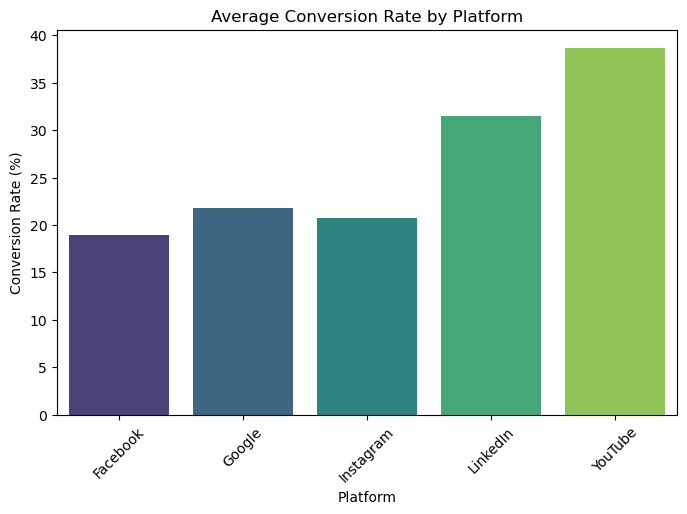

In [104]:
#1 Which platform delivers the highest conversion rate?

# Group by Platform and calculating average Conversion Rate
platform_conversion = df.groupby("Platform")["Conversion_Rate"].mean().reset_index()

# Plotting a bar chart
plt.figure(figsize=(8,5))
sns.barplot(x="Platform", y="Conversion_Rate", data=platform_conversion, palette="viridis")
plt.title("Average Conversion Rate by Platform")
plt.xlabel("Platform")
plt.ylabel("Conversion Rate (%)")
plt.xticks(rotation=45)
plt.show()


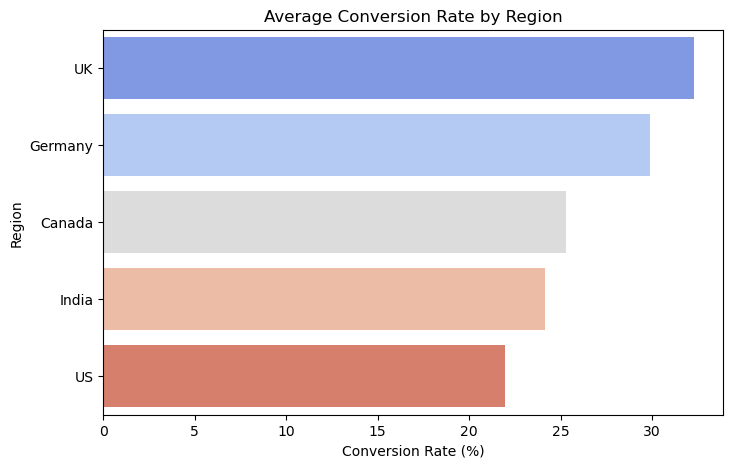

In [106]:
#2 Which regions (countries) have the best ad conversion rates?

# Group by Region and calculating average Conversion Rate
region_conversion = df.groupby("Region")["Conversion_Rate"].mean().reset_index()

# Sort values for better readability
region_conversion = region_conversion.sort_values(by="Conversion_Rate", ascending=False)

# Plotting a bar chart
plt.figure(figsize=(8,5))
sns.barplot(x="Conversion_Rate", y="Region", data=region_conversion, palette="coolwarm")
plt.title("Average Conversion Rate by Region")
plt.xlabel("Conversion Rate (%)")
plt.ylabel("Region")
plt.show()

<H4> What type of ad content drives the highest success rate?

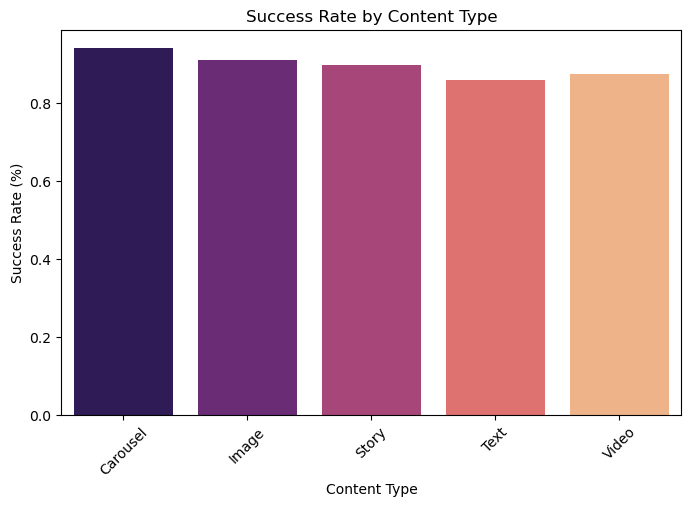

In [109]:
# Group by Content Type and calculating average Success Rate
content_success = df.groupby("Content_Type")["Success"].mean().reset_index()

# Plotting a bar chart
plt.figure(figsize=(8,5))
sns.barplot(x="Content_Type", y="Success", data=content_success, palette="magma")
plt.title("Success Rate by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Success Rate (%)")
plt.xticks(rotation=45)
plt.show()

<H4> What is the ideal budget range for a successful ad campaign?

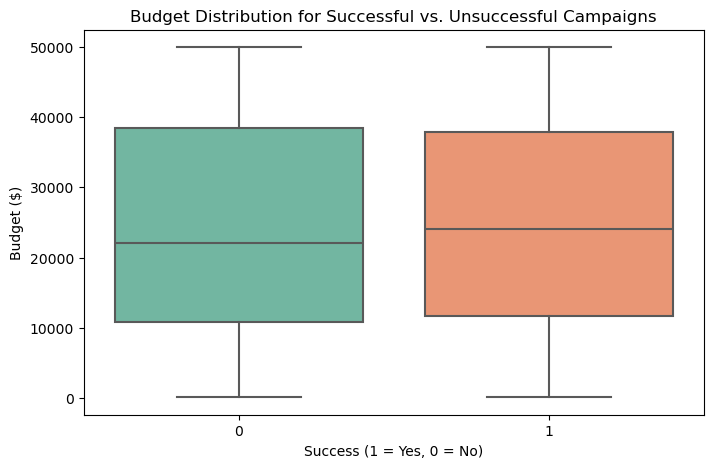

In [112]:
# Boxplot of Budget vs. Success
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Success"], y=df["Budget"], palette="Set2")
plt.title("Budget Distribution for Successful vs. Unsuccessful Campaigns")
plt.xlabel("Success (1 = Yes, 0 = No)")
plt.ylabel("Budget ($)")
plt.show()

- The median budget (central line in each box) looks almost the same for both successful and unsuccessful campaigns.
This suggests that simply increasing budget doesn’t guarantee success.

<H4> Does campaign duration affect conversion rate?

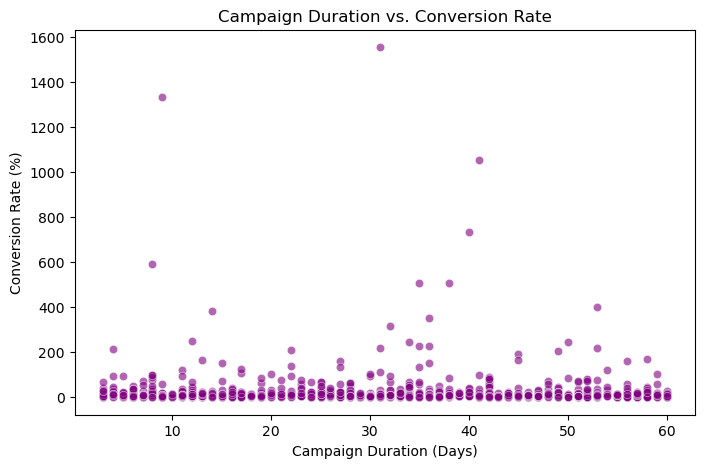

In [123]:
# Scatter plot of Duration vs Conversion Rate
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Duration"], y=df["Conversion_Rate"], alpha=0.6, color="purple")
plt.title("Campaign Duration vs. Conversion Rate")
plt.xlabel("Campaign Duration (Days)")
plt.ylabel("Conversion Rate (%)")
plt.show()

- Simply running a campaign longer doesn’t guarantee higher conversion rates. Other factors like platform, content type, and targeting strategy might have a bigger impact on conversion rates and outliers exist.